# A Basic 'SARIMA' Based Model 

Here we are going to do following steps:

1.Visulaize time series data

2.Apply techinques to make it stationary and test it.

3.Plot ACF and PACF to find the order of the model

4.Then construct model

5.Finally make the prediction


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
#reading the data
data=pd.read_csv('perrin-freres-monthly-champagne-.csv')
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
#renaming the column name
data.columns=['month','sales']

In [7]:
#dropping the unwated values
data.dropna(inplace=True)
data

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [8]:
#converting column to datetime and setting it to index
data.month=pd.to_datetime(data.month)
data.set_index(data.month,inplace=True)
data.drop('month',axis=1,inplace=True)
data.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


### Visualising the data

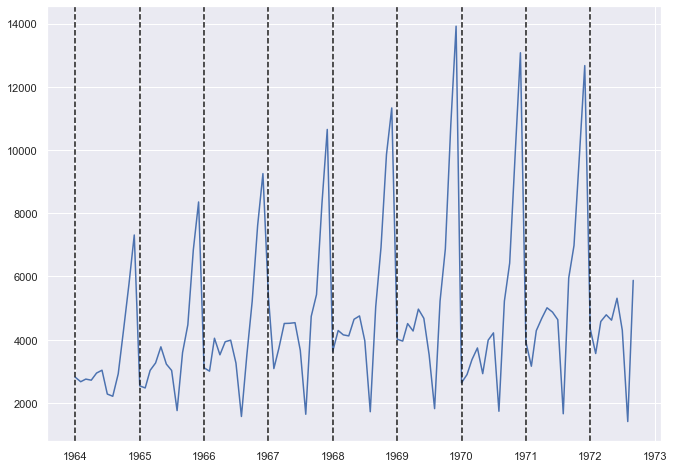

In [9]:
plt.figure(figsize=(11,8))
plt.plot(data)
for year in range(1964,1973):
    plt.axvline(pd.to_datetime(str(year)),linestyle='--',color='k')

### Checking for stationarity and performing the dickey fuller test

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#H0 null hypotesis it is not stationary
#H1 it is stationary
test_result=adfuller(data.sales)
print('p-value for this statistic is = ',test_result[1])

p-value for this statistic is =  0.3639157716602417


hence p value fails to reject the null hypothesis so it is not a stationary data

### To convert non stationary to stationary we do differencing and for the seasonal characteristic we have to do the differencing of 12 

In [15]:
data['sales first difference']=data.sales-data.sales.shift(1)
data['seasonal first difference']=data.sales-data.sales.shift(12)
data.head(15)


,sales,sales first difference,seasonal first difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [156]:
#H0 null hypotesis it is not stationary
#H1 it is stationary
test_result=adfuller(data['seasonal first difference'].dropna())
print('p-value for this statistic is = ',test_result[1])

p-value for this statistic is =  2.060579696813685e-11


Now p value is below .05 so we have clear evidence to reject null hypothesis


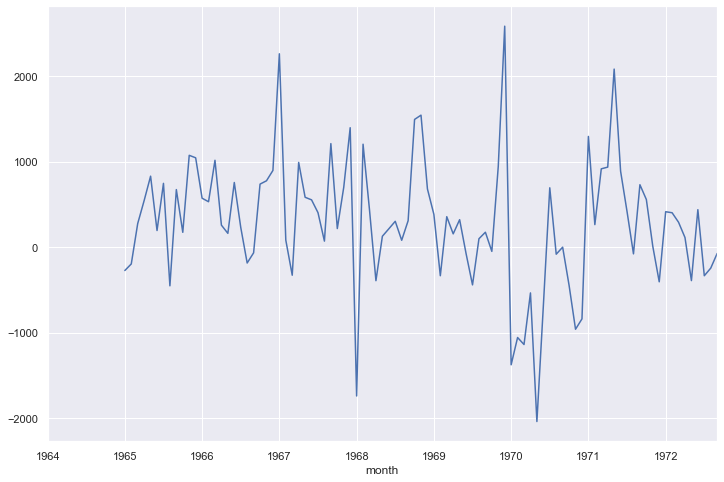

In [157]:
plt.figure(figsize=(12,8))
data['seasonal first difference'].plot()

It looks a plot stationary

In [21]:
#we create a final dataframe for ACF and PACF
final=data.dropna()

In [22]:
final.drop(['sales','sales first difference'],axis=1,inplace=True)

C:\Users\AKASH pc\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
print(final.shape)
final.head()

(93, 1)


,seasonal first difference
month,
1965-01-01,-274.0
1965-02-01,-197.0
1965-03-01,276.0
1965-04-01,545.0
1965-05-01,830.0


### ACF and PACF Plots to find the order of model

In [24]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

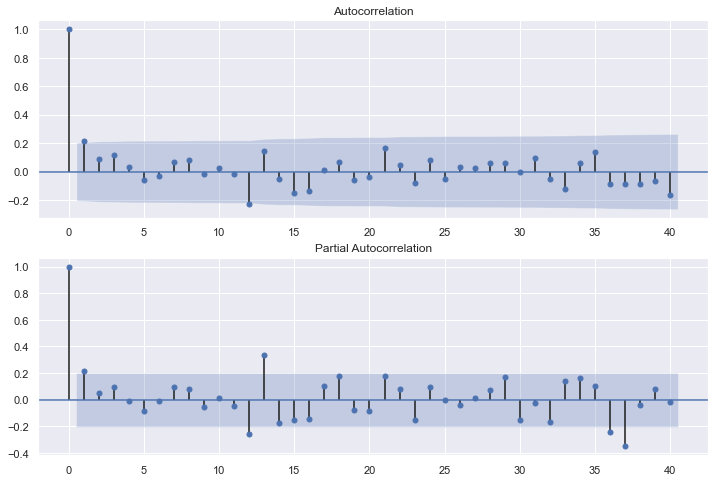

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(final,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(final,lags=40,ax=ax2)

we after looking at the order we will take order(p,q)=(1,1) for AR ,MA and d as 1

### Fitting the model

In [33]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data.sales,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\AKASH pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [34]:
data.forecast=model_fit.predict(start=50,end=103)

<ipython-input-34-55fb4c97bfc1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.forecast=model_fit.predict(start=50,end=103)


### Visualising the model

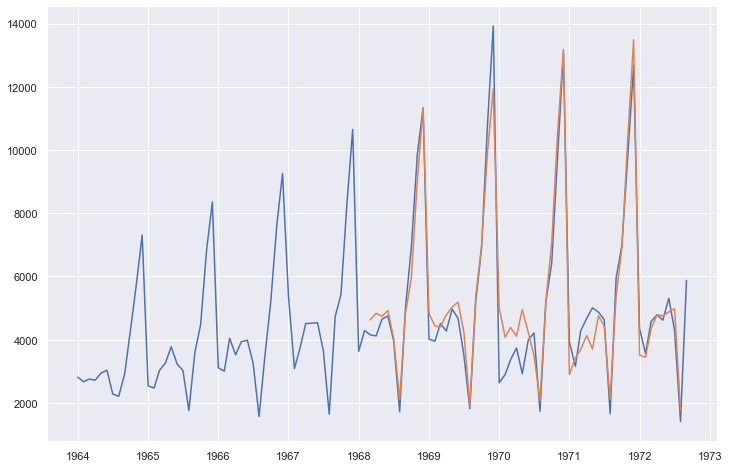

In [38]:
plt.figure(figsize=(12,8))
plt.plot(data.sales)
plt.plot(data.forecast)

### Now predicting the model for future results

In [39]:
data.future_forecast=model_fit.predict(start=103,end=123)

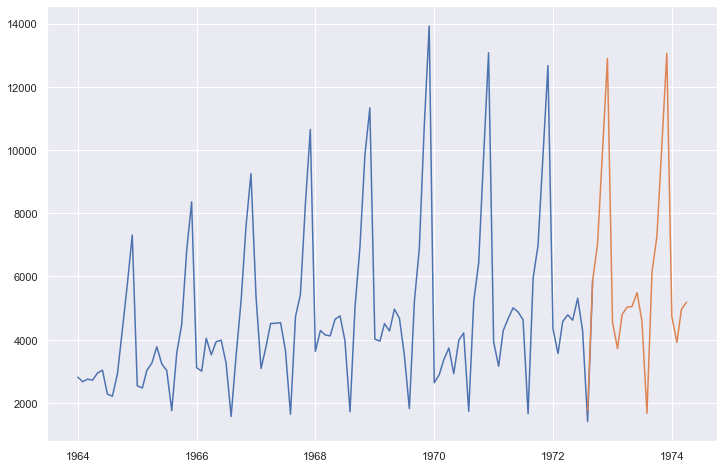

In [40]:
plt.figure(figsize=(12,8))
plt.plot(data.sales)
plt.plot(data.future_forecast)